# Experiment 2. 

I am running the algorithms for a fully connected network.

In [1]:
import preprocessing as ps
import numpy as np
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import random
random.seed(42)
import csv

In [2]:
# create the project networks
list_1 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T')]
list_2 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T'), ('DM', 'DB'), ('DM', 'AI'), ('DB', 'AI')]
list_3 = [('DM', 'T'), ('DB', 'T'), ('AI', 'DB')]

star_proj = ps.createProjectNetwork(list_1)
full_proj = ps.createProjectNetwork(list_2)
chain_proj = ps.createProjectNetwork(list_3)

## Experiment 1

In this experiment, 
1. I run on samples of the network. (10, 20, 30, 40, 50)
   - First using uniform random sampling.
2. I am using the average sum of adjacent weights as the team influence measure. 

### Uniform Random Sampling

In [3]:
def add_weights(network):
    """
    Adds edges to the network with a weight value based on the minimum weight in the network.

    Parameters:
    - network: The network to add edges to.

    Returns:
    - network
    """

    # Find the minimum weight in the network
    min_weight = min(nx.get_edge_attributes(network, 'weight').values())

    # Iterate over all pairs of nodes
    for node1 in network.nodes():
        for node2 in network.nodes():
            # Check if there is no edge between the nodes
            if not network.has_edge(node1, node2):
                # Add the edge with the weight value
                network.add_edge(node1, node2, weight=0.1 * min_weight)

    return network


In [4]:
projects = [(star_proj, "Star-Structured Project"), (full_proj, "Fully-connected Structured Project"), (chain_proj, "Chain-Structured Project")]

for i in range(10, 51, 10):
    network = pickle.load(open(f"./networks/subnets/{i}_nodes.pkl", 'rb'))
    network = add_weights(network.copy())
    print(f">>>>>>>>>>>>>>>>>> {i} Node network <<<<<<<<<<<<<<<<<\n")
    with open(f'./results/exp_2/{i}_node_network.csv', 'w', newline='') as file:
        writer = csv.writer(file)

        for project in projects:
            print(f"*********** {project[1]} ***********")
            writer.writerow([project[1]])
            writer.writerow([])
            # Greedy
            print("\n--------      Using Greedy Strategy     -------\n")
            obj_max_1 = 0.0
            best_set_1 = set()
            for node in network.nodes():
                subset, comm_eff = ps.Greedy(network, project[0], node, beta=None)
                if comm_eff > obj_max_1:
                    obj_max_1 = comm_eff
                    best_set_1 = subset

            leaders_eff_1 = ps.sum_edge_weights(network.subgraph(best_set_1))
            print("Coordinators communication efficiency", leaders_eff_1)
            print(f"Objective value : {obj_max_1}")
            team_eff_1 = round(obj_max_1 - leaders_eff_1, 4)

            for node in best_set_1:
                print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {leaders_eff_1}")
            
            title_attributes = f"Node Ranking for {project[1]} Under Greedy Strategy"
            writer.writerow([title_attributes])
            writer.writerow(['Author', "Label", "Rank"])
            for node in best_set_1:
                print(f"Team :{network.nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network, node)}")
                writer.writerow([node, network.nodes[node]['label'], ps.get_node_rank(network, node)])
            writer.writerow([])

            # Influence Greedy
            print("\n--------      Using influence Greedy Strategy     -------\n")
            obj_max_2 = 0.0
            best_set_2 = set()
            print("Influential First")
            influential_nodes = ps.get_top_ranked_node_each_group(network)
            for node in influential_nodes:
                subset, comm_eff = ps.Greedy(network, project[0], node, beta=None)
                if comm_eff > obj_max_2:
                    obj_max_2 = comm_eff
                    best_set_2 = subset

            leaders_eff_2 = ps.sum_edge_weights(network.subgraph(best_set_2))
            print("Coordinators communication efficiency", leaders_eff_2)
            print(f"Objective value : {obj_max_2}")
            team_eff_2 = obj_max_2 - leaders_eff_2

            writer.writerow([])
            title_attributes = f"Node Ranking for {project[1]} Under Influence Greedy Strategy"
            writer.writerow([title_attributes])
            writer.writerow(['Author', "Label", "Rank"])
            for node in best_set_2:
                print(f"Team :{network.nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network, node)}")
                writer.writerow([node, network.nodes[node]['label'], ps.get_node_rank(network, node)])
            writer.writerow([])

            writer.writerow([])
            title_attributes = f"Node Ranking for {project[1]} Under Influence Greedy Strategy"
            writer.writerow([title_attributes])
            writer.writerow(['Algorithm', "Objective Function", "Leaders Efficiency", "Team efficiency"])
            writer.writerow(['Greedy', obj_max_1, leaders_eff_1, team_eff_1])
            writer.writerow(['Inf Greedy', obj_max_2, leaders_eff_2, team_eff_2])
            writer.writerow([])

            print("\n\n")

>>>>>>>>>>>>>>>>>> 10 Node network <<<<<<<<<<<<<<<<<

*********** Star-Structured Project ***********

--------      Using Greedy Strategy     -------

Coordinators communication efficiency 27.07
Objective value : 80.824
Team :T, Node: Or Meir Rank: 27.07
Team :DB, Node: David Aumueller Rank: 27.07
Team :DM, Node: Shojiro Nishio Rank: 27.07
Team :AI, Node: Yuhong Guo Rank: 27.07
Team :T, Node: Or Meir, Rank: 1
Team :DB, Node: David Aumueller, Rank: 6
Team :DM, Node: Shojiro Nishio, Rank: 8
Team :AI, Node: Yuhong Guo, Rank: 8

--------      Using influence Greedy Strategy     -------

Influential First
Coordinators communication efficiency 16.36
Objective value : 50.209
Team :AI, Node: Greg Hamerly, Rank: 1
Team :T, Node: Or Meir, Rank: 1
Team :DM, Node: Xintao Wu, Rank: 9
Team :DB, Node: Daniel Gyllstrom, Rank: 2



*********** Fully-connected Structured Project ***********

--------      Using Greedy Strategy     -------

Coordinators communication efficiency 27.07
Objective value : 8

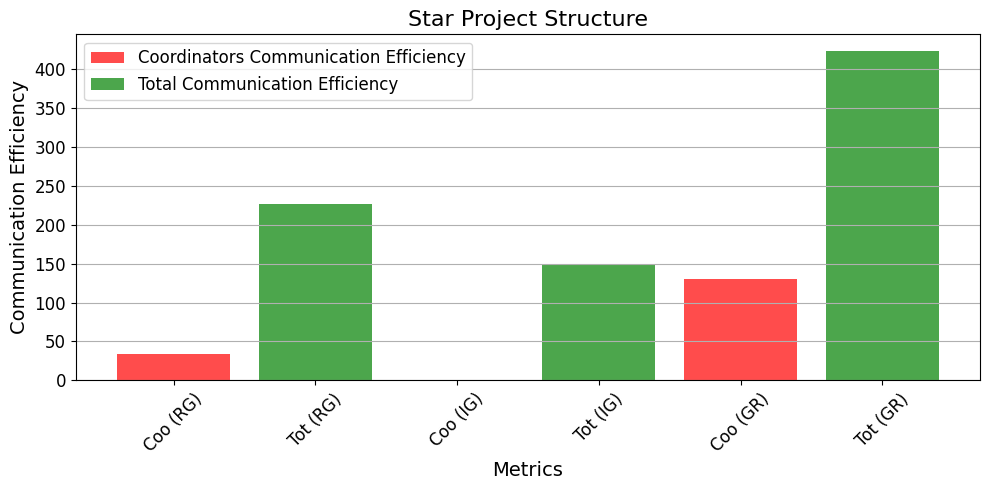

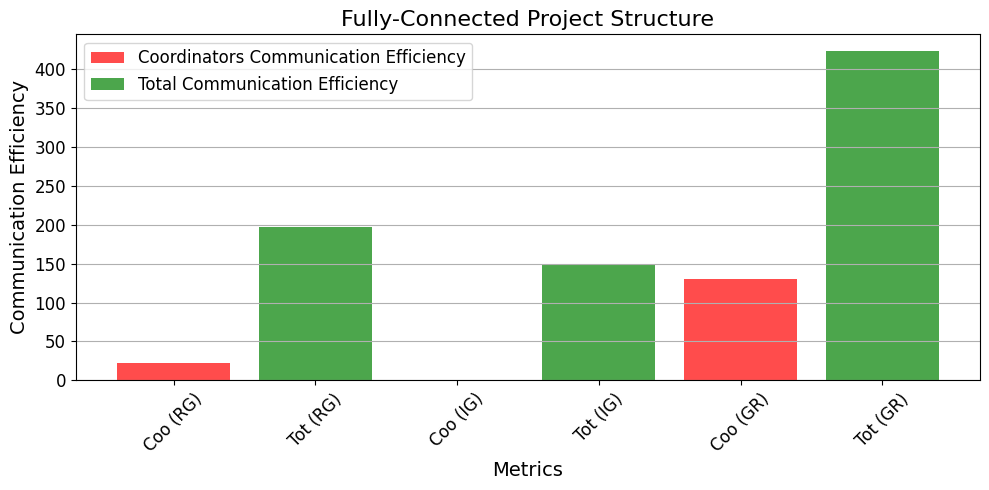

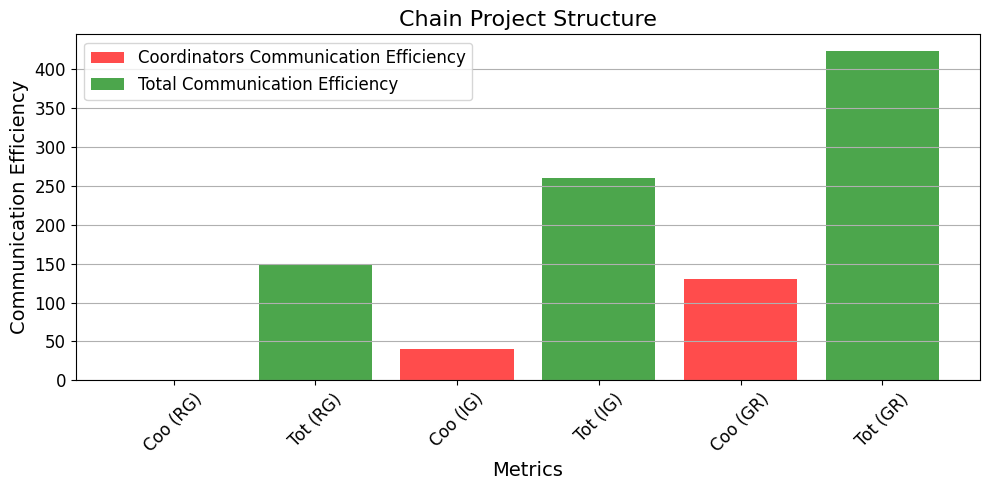

In [5]:
import matplotlib.pyplot as plt

# Data for the plots
data = {
    'Star': {
        'Random Greedy': {
            'Coordinators Communication Efficiency': 33.33,
            'Total Communication Efficiency': 225.9043
        },
        'Influence Greedy': {
            'Coordinators Communication Efficiency': 0,
            'Total Communication Efficiency': 150.0
        },
        'Greedy': {
            'Coordinators communication efficiency': 130.0,
            'Total Communication Efficiency': 423.2008,
        }
    },
    'Fully-Connected': {
        'Random Greedy': {
            'Coordinators Communication Efficiency': 22.220000000000002,
            'Total Communication Efficiency': 196.5813
        },
        'Influence Greedy': {
            'Coordinators Communication Efficiency': 0,
            'Total Communication Efficiency': 150.0
        },
        'Greedy': {
            'Coordinators communication efficiency': 130.0,
            'Total Communication Efficiency': 423.2008,
        }
    },
    'Chain': {
        'Random Greedy': {
            'Coordinators Communication Efficiency': 0,
            'Total Communication Efficiency': 150.0
        },
        'Influence Greedy': {
            'Coordinators Communication Efficiency': 40.0,
            'Total Communication Efficiency': 260.0
        },
        'Greedy': {
            'Coordinators communication efficiency': 130.0,
            'Total Communication Efficiency': 423.2008,
        }
    }
}

# Define abbreviations for the algorithms
abbreviations = {'Random Greedy': 'RG', 'Influence Greedy': 'IG', 'Greedy': 'GR'}

# Plotting
for project, algorithms in data.items():
    plt.figure(figsize=(10, 5))
    plt.title(f'{project} Project Structure', fontsize=16)
    legends_added = False  # Flag to track if legends have been added
    for algorithm, metrics in algorithms.items():
        x = range(len(metrics))
        colors = ['r', 'g']
        abbrev = abbreviations[algorithm]
        for i, (metric, value) in enumerate(metrics.items()):
            color = colors[i] if 'Coordinators' in metric else 'g'
            plt.bar(f'{metric[:3]} ({abbrev})', value, label=metric, color=color, alpha=0.7)
        # Add legend if it hasn't been added before
        if not legends_added:
            plt.legend(fontsize=12)
            legends_added = True  # Set the flag to True after adding legends
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Communication Efficiency', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()